# 导入keras，使用ConvNet模型，开始EDA

In [1]:
import os,cv2,random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input,Dropout,Flatten,Convolution2D,MaxPooling2D,Dense,Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping
from keras.utils import np_utils


Using TensorFlow backend.


# Preparing the Data

In [2]:
# from sklearn.datasets import load_files
# from keras.utils import np_utils
# import numpy as np
# from glob import glob

# # define function to load train,test,and validation datasets
# def load_dataset(path):
#     data = load_files(path)
#     data_files = np.array(data['filenames'])
#     return data_files

# # load train,test datasets
# train_images = load_dataset('/train')
# train_dogs = load_dataset('/train')
# train_cats = load_dataset('/train')

# test_images = load_dataset('/test')

In [3]:
TRAIN_DIR = 'D:/ctvsdg/train/'
TEST_DIR = 'D:/ctvsdg/test/'

ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]


# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_dogs[:1000] + train_cats[:1000]
random.shuffle(train_images)
test_images =  test_images[:25]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25
Train shape: (2000, 3, 64, 64)
Test shape: (25, 3, 64, 64)


## 生成标签
我们在处理的是一个贝叶斯分类的问题：1代表dog，而0代表cat。标签可以循环存储在字典中。可以看到数据的平衡性非常好，即猫和狗的数量基本一致。

Text(0.5, 1.0, 'Cats and Dogs')

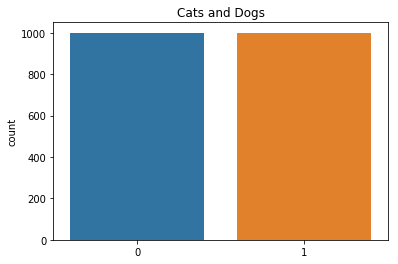

In [5]:
labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

sns.countplot(labels)
# print(labels)
plt.title('Cats and Dogs')

## 查看猫和狗的图片


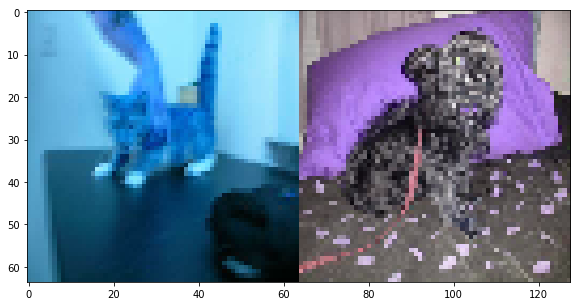

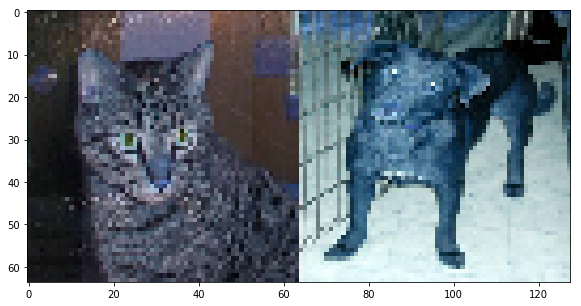

In [24]:
# define the function of cat&dogs
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    # np.concatenate 可完成数组的拼接
    pair = np.concatenate((cat,dog),axis=1)
    # figsize指定fig的宽和高
    plt.figure(figsize=(10,5))
    # 对图形进行处理，并显示其格式，但本身不能显示图片，需后加plt.show()
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,2):
    show_cats_and_dogs(idx)

### 如果显示猫和狗的均值图像，看起来像鬼一样。

Text(0.5, 1.0, 'Your Average Dog')

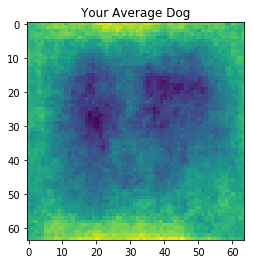

In [29]:
dog_avg = np.array([dog[0].T for i,dog in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(dog_avg)
plt.title('Your Average Dog')

Text(0.5, 1.0, 'Your Lovely cat')

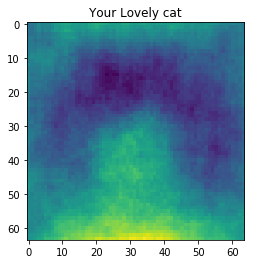

In [30]:
cat_avg = np.array([cat[0].T for i,cat in enumerate(train) if labels[i]==0]).mean(axis=0)
plt.imshow(cat_avg)
plt.title('Your Lovely cat')